In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pickle
from pathlib import Path
from itertools import product
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from typing import Tuple, List, NewType
import matplotlib.ticker as mtick

Figure = NewType('Figure', matplotlib.figure.Figure)
Axis   = NewType('Figure', matplotlib.axes.Axes)

def heat_plot(X: np.array, size: Tuple[int] = None,
              x_tick_labels: List[str] = None,
              y_tick_labels: List[str] = None,
              cmap: str = None) -> Tuple[Figure, Axis]:
    fig, ax = plt.subplots(1, 1)
    
    if size != None:
        fig.set_size_inches(size)
    else:
        fig.set_size_inches(w = 15, h = 10)
    
    sns.heatmap(X, linewidth = 0, ax = ax, cmap = cmap)
    
    ax.locator_params('x', nbins = 3)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    
    if x_tick_labels != None:
        ax.set_xticklabels(x_tick_labels)
    if y_tick_labels != None:
        ax.set_yticklabels(y_tick_labels)
    
    return fig, ax

In [118]:
results1 = pickle.load(open("1st_round_simulation_results.pickle", "rb"))
results2 = pickle.load(open("2nd_round_simulation_results.pickle", "rb"))
results3 = pickle.load(open("3nd_round_simulation_results.pickle", "rb"))

In [119]:
for key in results2.keys():
    results1[key] = results2[key]
    
for key in results3.keys():
    results1[key] = results3[key]

In [120]:
results = results1

In [121]:
parameters = {'network_size': [1000], 
              'memory_size': [100], 
              'prefferential_att': [2], 
              'code_length': [5], 
              'kappa': [0, 5, 8, 9.5, 10.5, 11.5, 15, 17, 20, 23, 25, 28, 30], 
              'gamma': [-5, -3, -1, 0, 1, 3, 5], 
              'lambda': [0], 
              'alpha': [0], 
              'omega': [0], 
              'T': 100, 
              'num_repetitions': 5, 
              'seed': 42, 
              'path_str': Path('experiments/experiment_5')}

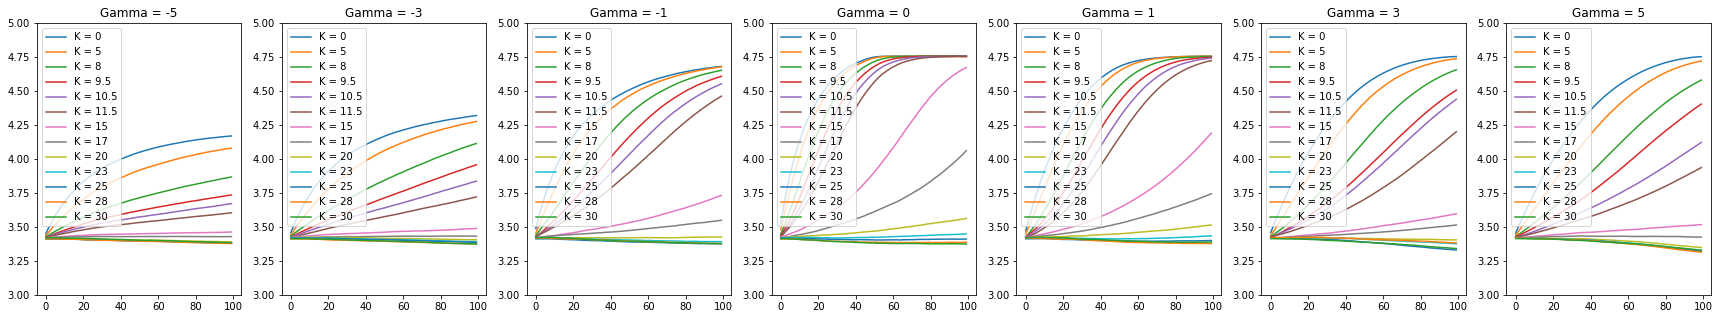

In [122]:
fig, axs = plt.subplots(nrows = 1, ncols = 7, figsize = (30, 5))

kappas = parameters['kappa']
gammas = parameters['gamma']
axs = axs.reshape(-1)

for i in range(len(gammas)):
    ax = axs[i]
    ax.set_ylim([3, 5.0])
    for j in range(len(kappas)):
        
        params = (1000, 100, 2, 5, kappas[j], gammas[i], 0, 0, 0)
        
        mean_entropy = results[params][0]['Entropy']
        X = range(len(mean_entropy))
        
        ax.plot(X, mean_entropy, label = f'K = {kappas[j]}')
        
        ax.set_title(f"Gamma = {gammas[i]}")
        ax.legend()

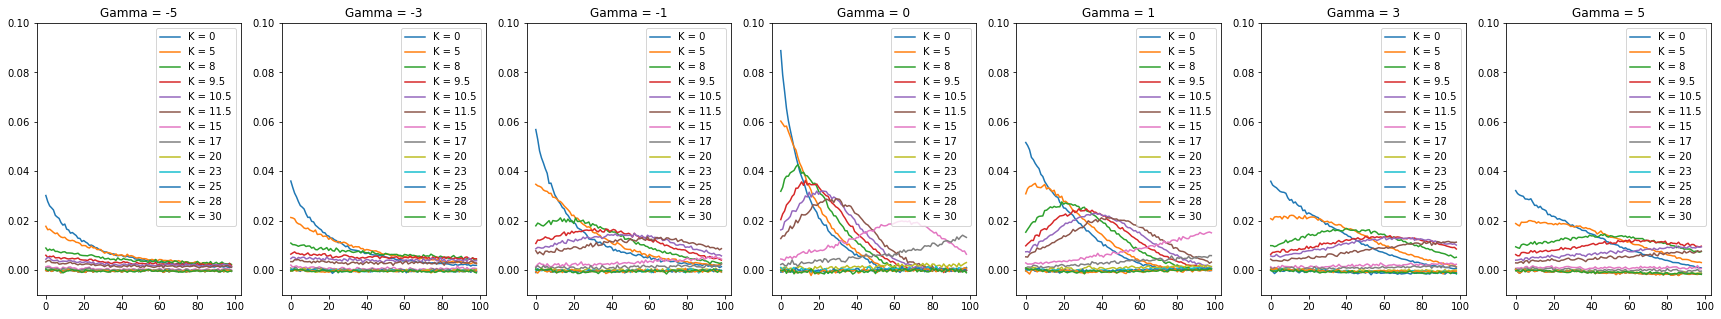

In [125]:
fig, axs = plt.subplots(nrows = 1, ncols = 7, figsize = (30, 5))

kappas = parameters['kappa']
gammas = parameters['gamma']
axs = axs.reshape(-1)

for i in range(len(gammas)):
    ax = axs[i]
    ax.set_ylim([-.01, .1])
    for j in range(len(kappas)):
        
        params = (1000, 100, 2, 5, kappas[j], gammas[i], 0, 0, 0)
        
        stats = results[params][0]['Entropy']
        stats = stats[1:] - stats[:-1]
        X = range(len(stats))
        
        ax.plot(X, stats, label = f'K = {kappas[j]}')
        
        ax.set_title(f"Gamma = {gammas[i]}")
        ax.legend()

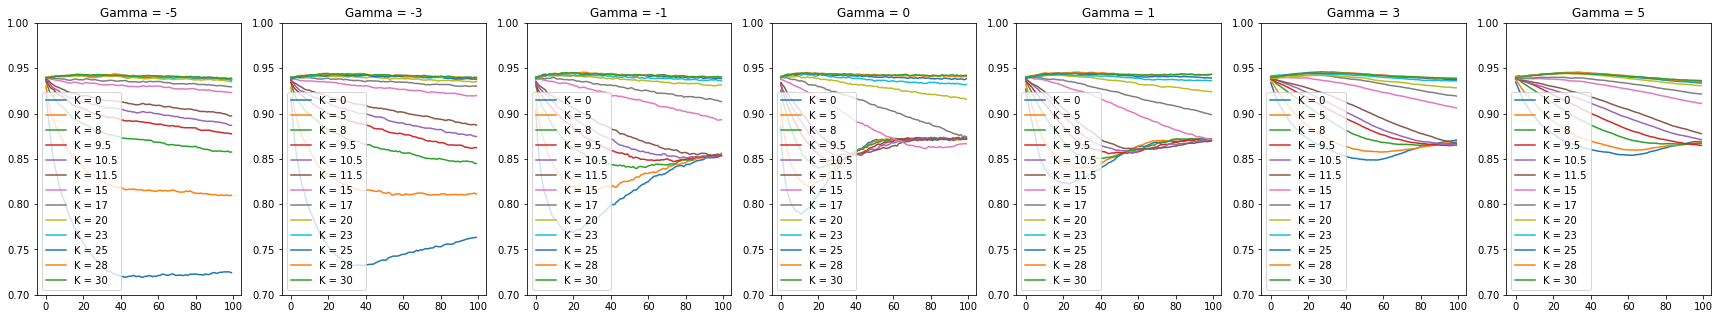

In [127]:
fig, axs = plt.subplots(nrows = 1, ncols = 7, figsize = (30, 5))

kappas = parameters['kappa']
gammas = parameters['gamma']
axs = axs.reshape(-1)

for i in range(len(gammas)):
    ax = axs[i]
    ax.set_ylim([0.7, 1])
    for j in range(len(kappas)):
        
        params = (1000, 100, 2, 5, kappas[j], gammas[i], 0, 0, 0)
        
        mean_entropy = results[params][0]['Proximity']
        X = range(len(mean_entropy))
        
        ax.plot(X, mean_entropy, label = f'K = {kappas[j]}')
        
        ax.set_title(f"Gamma = {gammas[i]}")
        ax.legend()

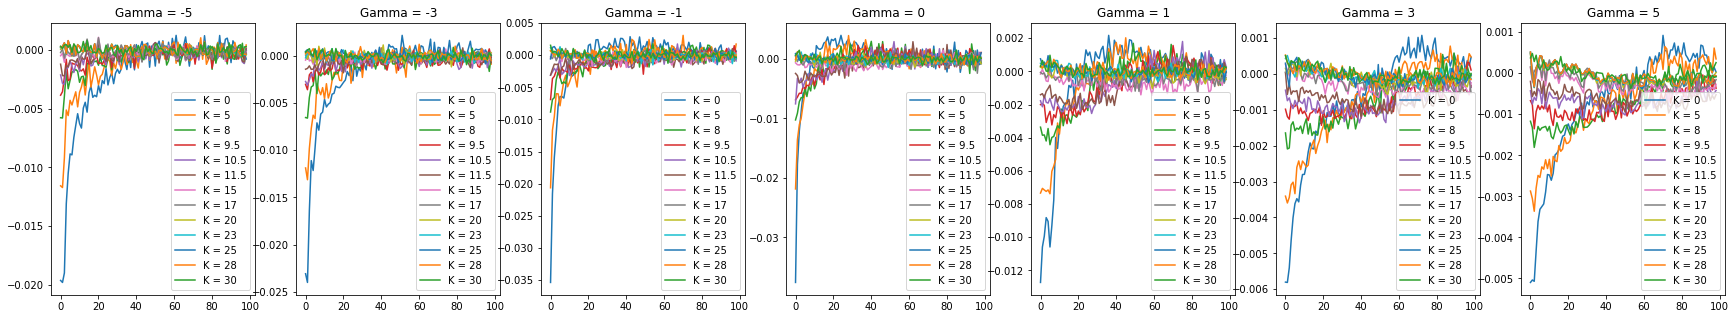

In [129]:
fig, axs = plt.subplots(nrows = 1, ncols = 7, figsize = (30, 5))

kappas = parameters['kappa']
gammas = parameters['gamma']
axs = axs.reshape(-1)

for i in range(len(gammas)):
    ax = axs[i]
    # ax.set_ylim([0.7, 1])
    for j in range(len(kappas)):
        
        params = (1000, 100, 2, 5, kappas[j], gammas[i], 0, 0, 0)
        
        stats = results[params][0]['Proximity']
        stats = stats[1:] - stats[:-1]
        X = range(len(stats))
        
        ax.plot(X, stats, label = f'K = {kappas[j]}')
        
        ax.set_title(f"Gamma = {gammas[i]}")
        ax.legend()

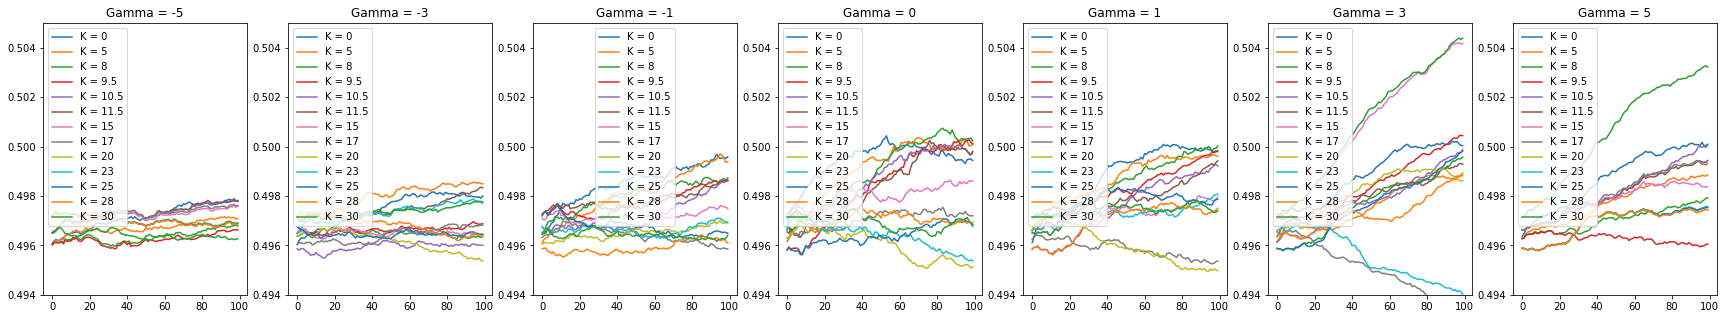

In [134]:
fig, axs = plt.subplots(nrows = 1, ncols = 7, figsize = (30, 5))

kappas = parameters['kappa']
gammas = parameters['gamma']
axs = axs.reshape(-1)

for i in range(len(gammas)):
    ax = axs[i]
    ax.set_ylim([0.494, 0.505])
    for j in range(len(kappas)):
        
        params = (1000, 100, 2, 5, kappas[j], gammas[i], 0, 0, 0)
        
        stats = results[params][0]['Polarity']
        X = range(len(stats))
        
        ax.plot(X, stats, label = f'K = {kappas[j]}')
        
        ax.set_title(f"Gamma = {gammas[i]}")
        ax.legend()

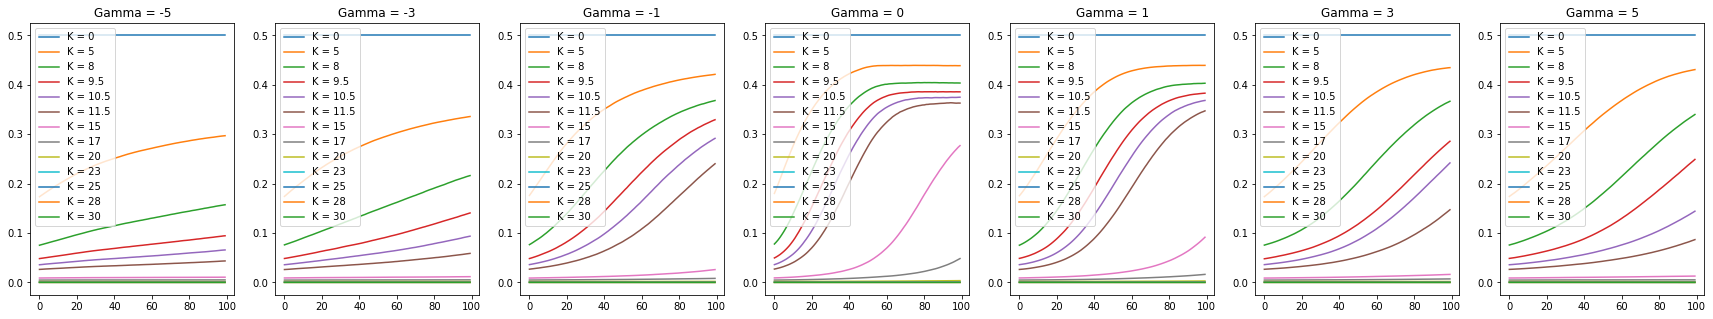

In [135]:
fig, axs = plt.subplots(nrows = 1, ncols = 7, figsize = (30, 5))

kappas = parameters['kappa']
gammas = parameters['gamma']
axs = axs.reshape(-1)

for i in range(len(gammas)):
    ax = axs[i]
    # ax.set_ylim([0.7, 1])
    for j in range(len(kappas)):
        
        params = (1000, 100, 2, 5, kappas[j], gammas[i], 0, 0, 0)
        
        mean_entropy = results[params][0]['Delta']
        X = range(len(mean_entropy))
        
        ax.plot(X, mean_entropy, label = f'K = {kappas[j]}')
        
        ax.set_title(f"Gamma = {gammas[i]}")
        ax.legend()

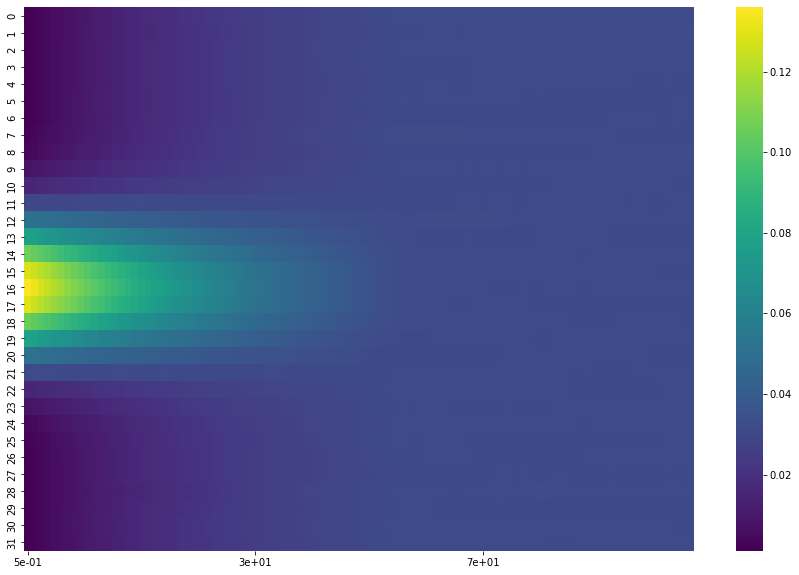

In [41]:
# [0, 5, 8, 9.5, 10.5, 11.5, 15]
params = (1000, 100, 2, 5, 0, 0, 0, 0, 0)
_results = results[params][0]['Distribution'].T
fig, ax = heat_plot(_results, cmap = 'viridis')

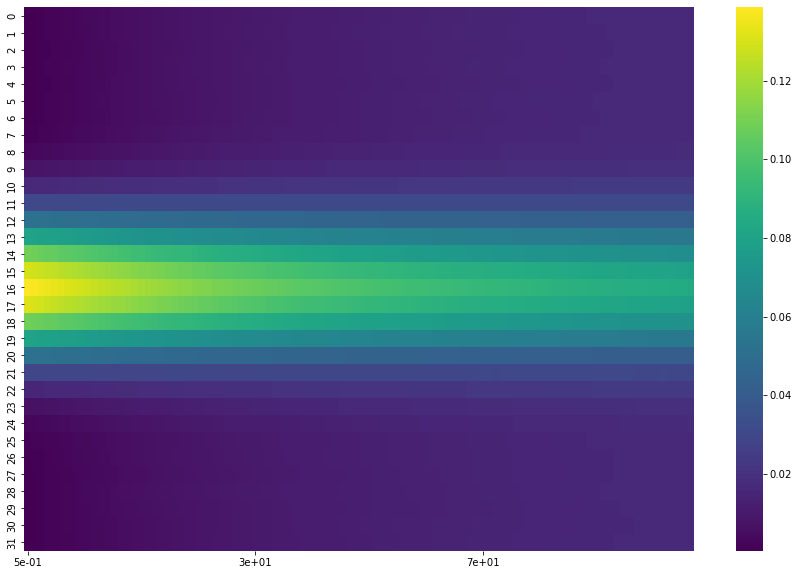

In [143]:
# [0, 5, 8, 9.5, 10.5, 11.5, 15]
# [-3, -1, 0, 1, 3]
params = (1000, 100, 2, 5, 0, -5, 0, 0, 0)
_results = results[params][0]['Distribution'].T
fig, ax = heat_plot(_results, cmap = 'viridis')

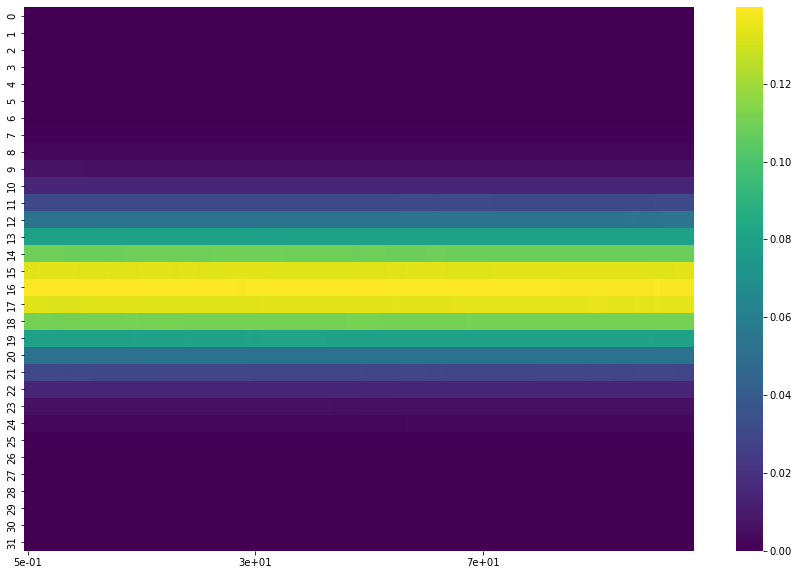

In [139]:
# [0, 5, 8, 9.5, 10.5, 11.5, 15]
# [-3, -1, 0, 1, 3]
params = (1000, 100, 2, 5, 30, -5, 0, 0, 0)
_results = results[params][0]['Distribution'].T
fig, ax = heat_plot(_results, cmap = 'viridis')